**Aplicação de técnicas de classificação de texto na arquitetura de Chatbots hierárquicos**

**Mestrado Profissional em Computação Aplicada - PPCA - Universidade de Brasília**

**Disciplina**: Mineração de Dados

**Orientador**: Prof. Dr. Marcelo Ladeira <mladeira@unb.br>

**Alunos**: 
 - José Ronaldo Agra De Souza Filho <jose.agra@aluno.unb.br>
 - Bruno Gomes Resende <bruno.resende@aluno.unb.br>
 - Célio Castro Wermelinger <celio.wermelinger@aluno.unb.br> 

**Palavras-Chave:**

Chatbot; Text Classification; Machine Learning; Text Mining; NLP;

In [29]:
# Install packages
# Note: use Python 3.8 env
#!pip install --pre pycaret

In [30]:
# Import packages
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *

# download das stopwords para o idioma português
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ronal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
# Montagem de datasets
df_covid = pd.read_csv('data/exemplos-treinamento-covid.csv', delimiter=';')
df_seloturismo = pd.read_csv('data/exemplos-treinamento-seloturismo.csv', delimiter=';')
df_tuberculose = pd.read_csv('data/exemplos-treinamento-tuberculose.csv', delimiter=';')
df_all = pd.concat([df_covid, df_seloturismo, df_tuberculose], axis=0)
df_all.describe()

,input,category
count,1042,1042
unique,1041,3
top,qual a vantagem de usar o selo,seloturismo
freq,2,639


In [32]:
# recupera as stopwords para o idioma português
stop_words = stopwords.words('portuguese')

# Vetorização das palavras
tv = TfidfVectorizer(lowercase=True, stop_words=stop_words, strip_accents='unicode', token_pattern="[A-Za-z]+")
tf_idf = tv.fit_transform(df_all['input'])
tf_idf_df = pd.DataFrame(tf_idf.toarray(), columns=tv.get_feature_names())
tf_idf_df['target_cat'] = df_all.reset_index().category.map({'covid':0, 'seloturismo':1, 'tuberculose':2})
tf_idf_df

,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,virilha,virus,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.379376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1038,0.0,0.0,0.0,0.0,0.499479,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1039,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1040,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [33]:
# Setup
# Iniciando os recursos da biblioteca, passando como alvo a coluna 'class' do dataset
setup = setup(data=tf_idf_df, target='target_cat', session_id=20221, train_size = 0.7, fold=10, silent=True)

,Description,Value
0,session_id,20221
1,Target,target_cat
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1042, 1047)"
5,Missing Values,False
6,Numeric Features,622
7,Categorical Features,424
8,Ordinal Features,False
9,High Cardinality Features,False


In [34]:
# Gerando modelos com diferentes abordagens e escolhendo o melhor por cross-validation
modelos = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9780,0.9969,0.9588,0.9790,0.9776,0.9585,0.9596,0.1180
dt,Decision Tree Classifier,0.9698,0.9622,0.9413,0.9710,0.9690,0.9426,0.9443,0.0260
rf,Random Forest Classifier,0.9657,0.9968,0.9332,0.9683,0.9645,0.9337,0.9369,0.1130
ridge,Ridge Classifier,0.9643,0.0000,0.9277,0.9666,0.9629,0.9314,0.9344,0.0250
gbc,Gradient Boosting Classifier,0.9630,0.9916,0.9274,0.9654,0.9619,0.9289,0.9318,0.5260
ada,Ada Boost Classifier,0.9451,0.9770,0.8952,0.9488,0.9421,0.8938,0.8991,0.0930
lightgbm,Light Gradient Boosting Machine,0.9356,0.9815,0.8793,0.9390,0.9316,0.8748,0.8808,0.0440
lr,Logistic Regression,0.9355,0.9993,0.8713,0.9425,0.9314,0.8730,0.8819,0.5300
nb,Naive Bayes,0.9232,0.9400,0.8950,0.9294,0.9239,0.8596,0.8620,0.0200
lda,Linear Discriminant Analysis,0.9218,0.9785,0.8846,0.9309,0.9217,0.8562,0.8612,0.1750


In [35]:
# Imprimindo melhor modelo
print(modelos)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20221, verbose=0,
                     warm_start=False)


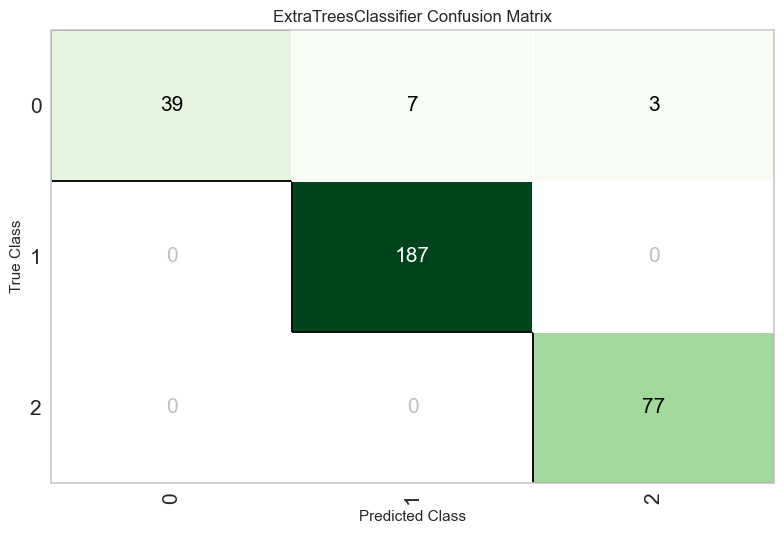

In [36]:
# Matriz de confusão TF-IDF
et = create_model('et')
plot_model(et, "confusion_matrix")

## Predição

In [37]:
# Realizando predição com dateset de validação
predict_model(et)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9681,0.9994,0.9320,0.9692,0.9665,0.9416,0.9432


,abracar,acesso,acho,acompanhamento,acontece,acontecera,acordo,acrescido,aderi,aderir,...,vantagens_0.8863410949707031,vantajoso_0.8135361075401306,vao_0.0,vem_0.6479084491729736,vindo_0.5517596006393433,vir_0.42635244131088257,vistorias_0.712486743927002,target_cat,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2,0.55
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,1.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.95
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00


In [38]:
# Realizando predição com dateset inteiro
predictions = predict_model(et, data=tf_idf_df)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9904,0.9999,0.9794,0.9905,0.9903,0.9823,0.9825


,abdomen,abracar,abraco,acesso,acho,acionar,acometer,acometidos,acompanhamento,acontece,...,visitar,visivel,vistoria,vistorias,vivo,voltar,vou,target_cat,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0.72


In [39]:
# Treinando o melhor modelo com Bagging e Boosting e escolhendo o melhor método entre estes 
# Caso a performance do modelo treinado seja inferior ao melhor modelo original, este é retornado
best_ensembled = ensemble_model(et, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9863,1.0000,0.9697,0.9866,0.9861,0.9745,0.9749
1,0.9863,0.9988,0.9804,0.9866,0.9862,0.9745,0.9749
2,0.9863,1.0000,0.9697,0.9866,0.9861,0.9745,0.9749
3,0.9178,0.9953,0.8396,0.9195,0.9133,0.8399,0.8476
4,0.9589,0.9982,0.9186,0.9600,0.9578,0.9208,0.9225
5,0.9726,0.9996,0.9394,0.9737,0.9715,0.9472,0.9489
6,0.9726,0.9988,0.9718,0.9726,0.9726,0.9497,0.9497
7,0.9863,1.0000,0.9722,0.9866,0.9861,0.9746,0.9750
8,0.9452,0.9890,0.8958,0.9497,0.9432,0.8948,0.9002


In [40]:
predict_model(best_ensembled)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9681,0.9994,0.9320,0.9692,0.9665,0.9416,0.9432


,abracar,acesso,acho,acompanhamento,acontece,acontecera,acordo,acrescido,aderi,aderir,...,vantagens_0.8863410949707031,vantajoso_0.8135361075401306,vao_0.0,vem_0.6479084491729736,vindo_0.5517596006393433,vir_0.42635244131088257,vistorias_0.712486743927002,target_cat,Label,Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,2,0.55
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,2,1.00
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.95
309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00
311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1.00


In [ ]:
modelo_final = finalize_model(best_ensembled)

# Salvando o modelo
save_model(best_ensembled, 'models/20220912-modelo-final-multiclasses-tdidf-et')